# データの概観

In [1]:
d <- read.csv('data4a.csv')
summary(d)
d

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,N,y,x,f
1,8,1,9.76,C
2,8,6,10.48,C
3,8,5,10.83,C
4,8,6,10.94,C
5,8,1,9.37,C
6,8,1,8.81,C
7,8,3,9.49,C
8,8,6,11.02,C
9,8,0,7.97,C
10,8,8,11.55,C


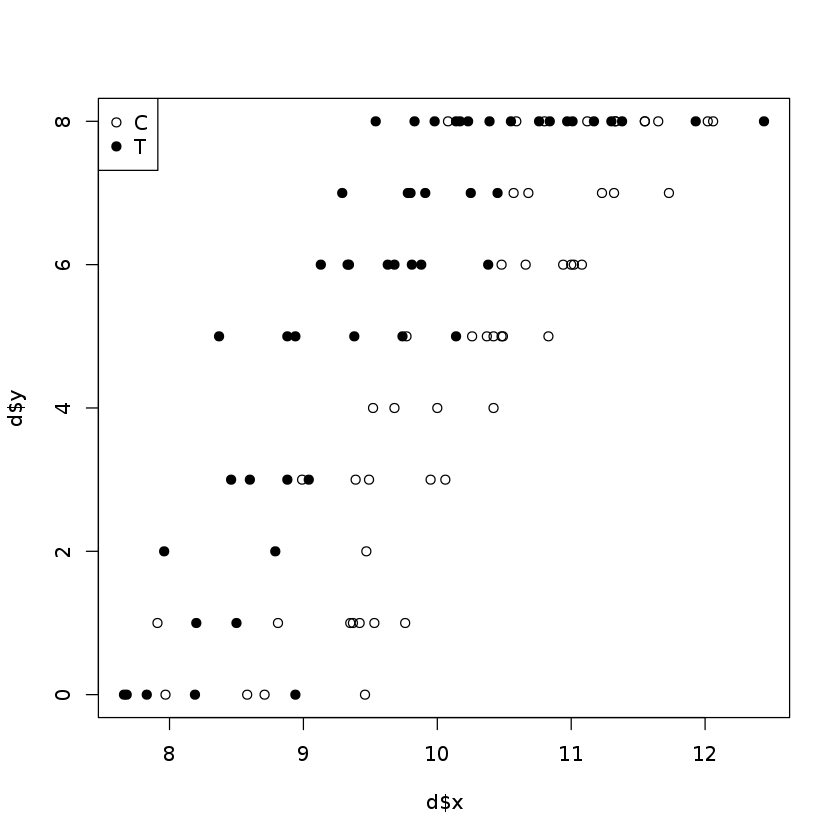

In [2]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

# ロジスティック関数の概観

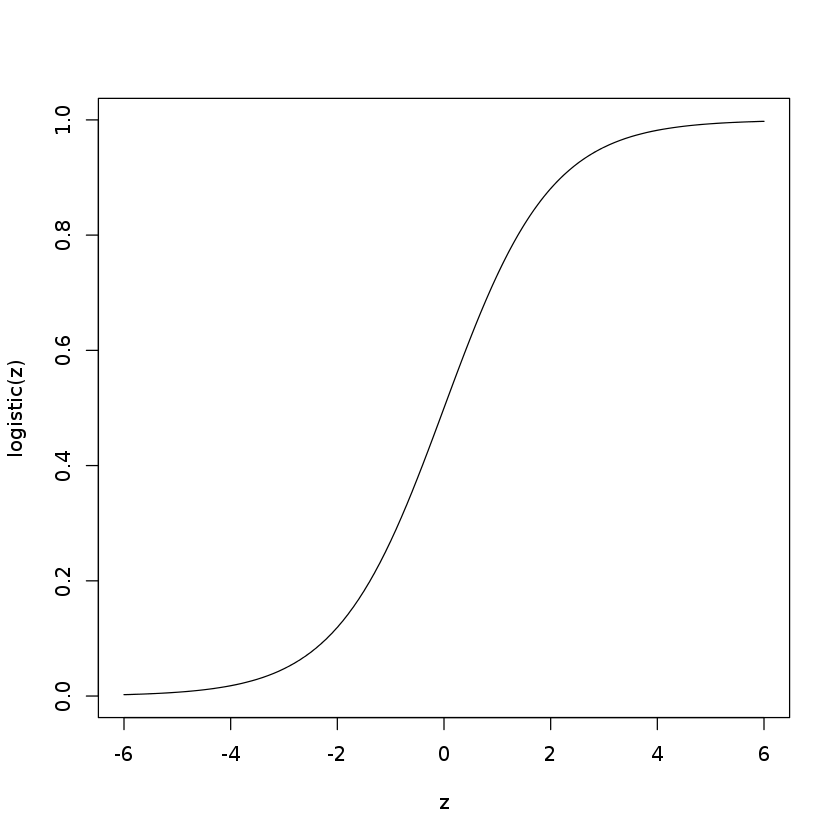

In [3]:
logistic <- function(z) 1 / (1 + exp(-z))
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type="l")

ロジスティック関数の逆関数がロジット関数。
\[
logit(q_i) = \log\frc{q_i}{1 - q_i}
\]

In [4]:
fit <- glm(cbind(y, N-y) ~ x + f, data = d, family = binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

応答変数が cbind(y, N-y)、family が binomial である点に注意。

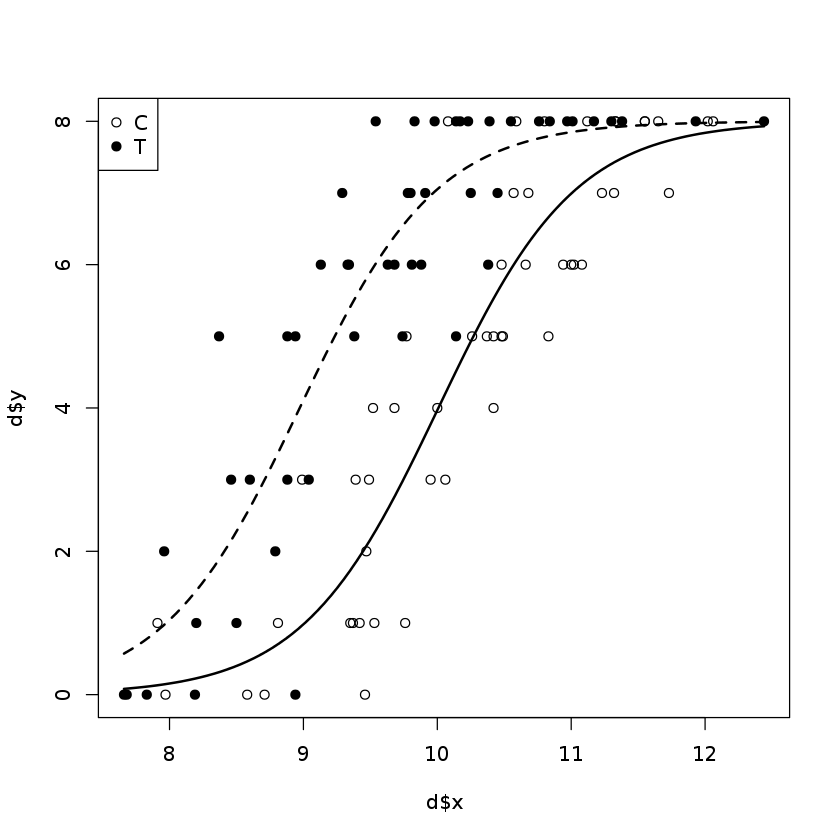

In [40]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-19.536 + 1.952 * xx) * d$N, lwd = 2)
lines(xx, logistic(-19.536 + 1.952 * xx + 2.022) * d$N, lwd = 2, lty=2)
legend("topleft", legend=c("C", "T"), pch=c(21, 19))